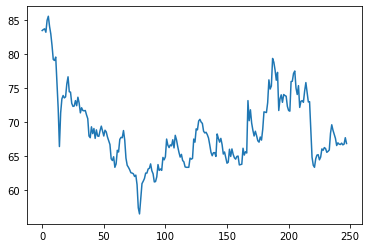

X shape is (245, 3)
Y shape is (245, 1)
Epoch 1/100
6/6 - 1s - loss: 0.1667 - mean_absolute_error: 0.3710 - 1s/epoch - 210ms/step
Epoch 2/100
6/6 - 0s - loss: 0.1469 - mean_absolute_error: 0.3454 - 9ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 0.1328 - mean_absolute_error: 0.3260 - 10ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.1203 - mean_absolute_error: 0.3084 - 9ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.1087 - mean_absolute_error: 0.2911 - 11ms/epoch - 2ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0978 - mean_absolute_error: 0.2734 - 12ms/epoch - 2ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0877 - mean_absolute_error: 0.2563 - 10ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0779 - mean_absolute_error: 0.2390 - 11ms/epoch - 2ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0687 - mean_absolute_error: 0.2209 - 10ms/epoch - 2ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0602 - mean_absolute_error: 0.2029 - 9ms/epoch - 2ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0523 - mean_absolute_error: 0.

Epoch 91/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0389 - 10ms/epoch - 2ms/step
Epoch 92/100
6/6 - 0s - loss: 0.0032 - mean_absolute_error: 0.0389 - 11ms/epoch - 2ms/step
Epoch 93/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0385 - 10ms/epoch - 2ms/step
Epoch 94/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0382 - 9ms/epoch - 1ms/step
Epoch 95/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0384 - 10ms/epoch - 2ms/step
Epoch 96/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0383 - 9ms/epoch - 2ms/step
Epoch 97/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0389 - 11ms/epoch - 2ms/step
Epoch 98/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0384 - 9ms/epoch - 1ms/step
Epoch 99/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0386 - 9ms/epoch - 1ms/step
Epoch 100/100
6/6 - 0s - loss: 0.0031 - mean_absolute_error: 0.0383 - 9ms/epoch - 2ms/step
2/2 [==============================] - 0s 2ms/step


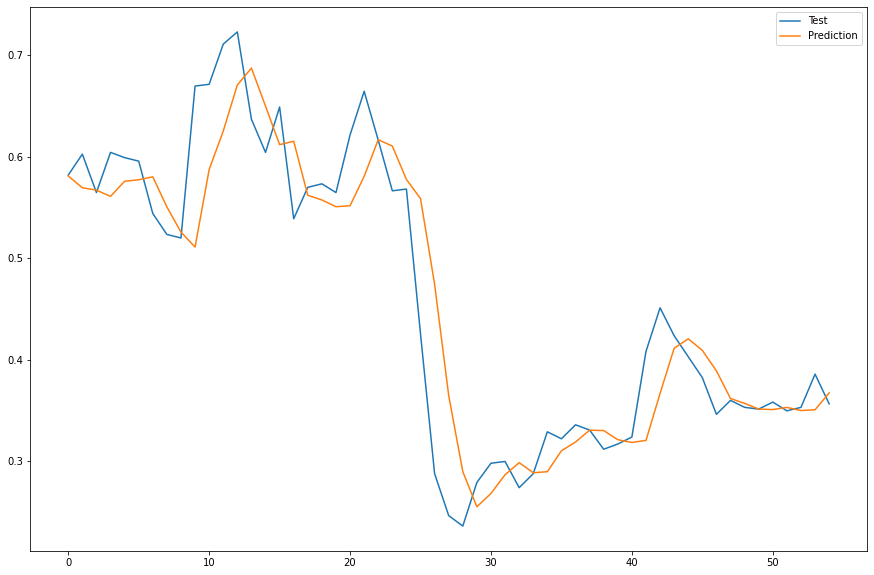

In [39]:
#-----This code is motivated from https://medium.com/@marianne.benkamoun/stock-price-prediction-using-recurrent-neural-networks-369c21817da8
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 


#-------------------------------------------------------------------------------------#
# HFCL Stock
df = pd.read_csv('HFCl.NS.csv') # Data downloaded from Yahoo Finance
df.head()

#-------------------------------------------------------------------------------------#
# Data Loading and Pre-processing
'''df = pd.read_csv('NASDAQ.csv')
df.head()

L = len(df)
Y = df.iloc[:, 4].values 
Y = np.array(Y)

# No need to reshape 'Y' for plotting
plt.plot(Y)
plt.show(block=False)
'''
L = len(df)
Y = df.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

#-------------------------------------------------------------------------------------#
# Reshaping
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

#-------------------------------------------------------------------------------------#
# Scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))


#----------------------------------------------------------------------------------#
# Train and Test
X_train = X[:190,:,:]
X_test = X[190:,:,:]
Y_train = Y[:190,:]
Y_test = Y[190:,:]

#-----------------------------------------------------------------------------------#
# Model Building
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

#---------------------------------------------------------------------------------#
#Plot 
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

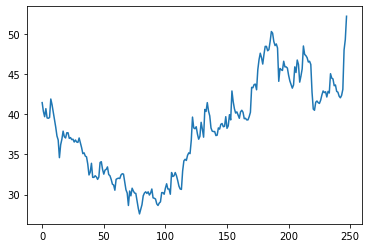

X shape is (245, 3)
Y shape is (245, 1)
Epoch 1/100
6/6 - 1s - loss: 0.1924 - mean_absolute_error: 0.3735 - 1s/epoch - 216ms/step
Epoch 2/100
6/6 - 0s - loss: 0.1624 - mean_absolute_error: 0.3372 - 8ms/epoch - 1ms/step
Epoch 3/100
6/6 - 0s - loss: 0.1425 - mean_absolute_error: 0.3117 - 10ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.1257 - mean_absolute_error: 0.2889 - 11ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.1108 - mean_absolute_error: 0.2684 - 10ms/epoch - 2ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0975 - mean_absolute_error: 0.2480 - 11ms/epoch - 2ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0856 - mean_absolute_error: 0.2296 - 10ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0745 - mean_absolute_error: 0.2121 - 10ms/epoch - 2ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0647 - mean_absolute_error: 0.1962 - 12ms/epoch - 2ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0559 - mean_absolute_error: 0.1818 - 9ms/epoch - 1ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0481 - mean_absolute_error: 0

Epoch 91/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0316 - 12ms/epoch - 2ms/step
Epoch 92/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0315 - 11ms/epoch - 2ms/step
Epoch 93/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0317 - 13ms/epoch - 2ms/step
Epoch 94/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0316 - 12ms/epoch - 2ms/step
Epoch 95/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0320 - 14ms/epoch - 2ms/step
Epoch 96/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0314 - 16ms/epoch - 3ms/step
Epoch 97/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0320 - 12ms/epoch - 2ms/step
Epoch 98/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0314 - 13ms/epoch - 2ms/step
Epoch 99/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0317 - 14ms/epoch - 2ms/step
Epoch 100/100
6/6 - 0s - loss: 0.0019 - mean_absolute_error: 0.0320 - 12ms/epoch - 2ms/step
2/2 [==============================] - 0s 3ms/step


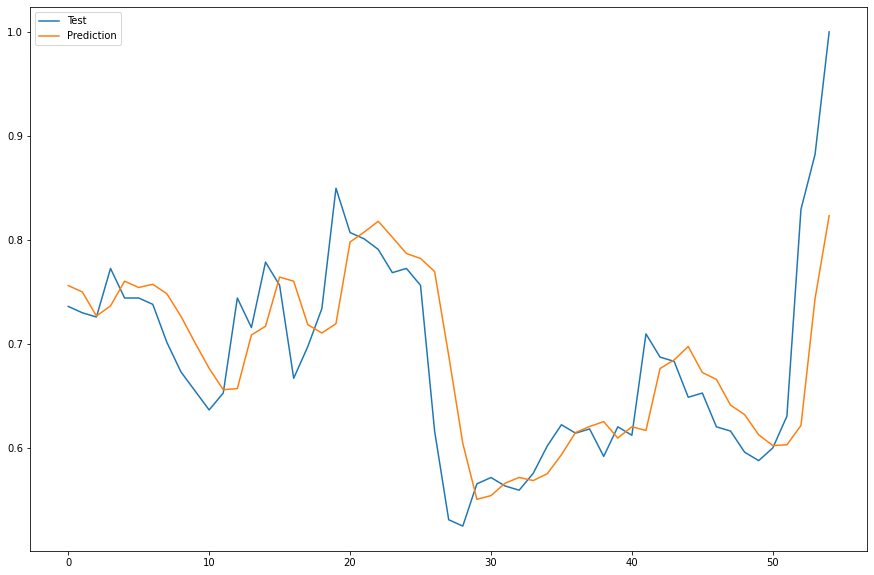

In [42]:
#-----This code is motivated from https://medium.com/@marianne.benkamoun/stock-price-prediction-using-recurrent-neural-networks-369c21817da8
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 


#-------------------------------------------------------------------------------------#
# HFCL Stock
df = pd.read_csv('TV18.csv')
df.head()

#-------------------------------------------------------------------------------------#
# Data Loading and Pre-processing
'''df = pd.read_csv('NASDAQ.csv')
df.head()

L = len(df)
Y = df.iloc[:, 4].values 
Y = np.array(Y)

# No need to reshape 'Y' for plotting
plt.plot(Y)
plt.show(block=False)
'''
L = len(df)
Y = df.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

#-------------------------------------------------------------------------------------#
# Reshaping
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

#-------------------------------------------------------------------------------------#
# Scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))


#----------------------------------------------------------------------------------#
# Train and Test
X_train = X[:190,:,:]
X_test = X[190:,:,:]
Y_train = Y[:190,:]
Y_test = Y[190:,:]

#-----------------------------------------------------------------------------------#
# Model Building
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

#---------------------------------------------------------------------------------#
#Plot 
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()


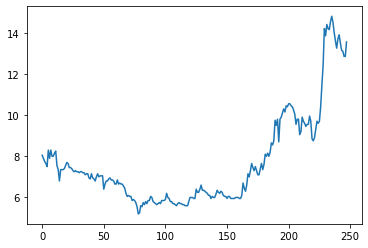

X shape is (245, 3)
Y shape is (245, 1)
Epoch 1/100
6/6 - 1s - loss: 0.0268 - mean_absolute_error: 0.1370 - 1s/epoch - 212ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0206 - mean_absolute_error: 0.1140 - 11ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0169 - mean_absolute_error: 0.0985 - 13ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0140 - mean_absolute_error: 0.0869 - 13ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0117 - mean_absolute_error: 0.0778 - 19ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0098 - mean_absolute_error: 0.0710 - 16ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0084 - mean_absolute_error: 0.0669 - 11ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0072 - mean_absolute_error: 0.0640 - 14ms/epoch - 2ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0064 - mean_absolute_error: 0.0623 - 12ms/epoch - 2ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0058 - mean_absolute_error: 0.0608 - 16ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0055 - mean_absolute_error:

Epoch 89/100
6/6 - 0s - loss: 5.8718e-04 - mean_absolute_error: 0.0165 - 13ms/epoch - 2ms/step
Epoch 90/100
6/6 - 0s - loss: 5.8898e-04 - mean_absolute_error: 0.0163 - 12ms/epoch - 2ms/step
Epoch 91/100
6/6 - 0s - loss: 5.7936e-04 - mean_absolute_error: 0.0158 - 9ms/epoch - 1ms/step
Epoch 92/100
6/6 - 0s - loss: 5.8124e-04 - mean_absolute_error: 0.0162 - 10ms/epoch - 2ms/step
Epoch 93/100
6/6 - 0s - loss: 5.8115e-04 - mean_absolute_error: 0.0164 - 8ms/epoch - 1ms/step
Epoch 94/100
6/6 - 0s - loss: 5.9401e-04 - mean_absolute_error: 0.0161 - 10ms/epoch - 2ms/step
Epoch 95/100
6/6 - 0s - loss: 5.8036e-04 - mean_absolute_error: 0.0161 - 9ms/epoch - 1ms/step
Epoch 96/100
6/6 - 0s - loss: 5.9485e-04 - mean_absolute_error: 0.0164 - 10ms/epoch - 2ms/step
Epoch 97/100
6/6 - 0s - loss: 5.9516e-04 - mean_absolute_error: 0.0167 - 11ms/epoch - 2ms/step
Epoch 98/100
6/6 - 0s - loss: 5.8820e-04 - mean_absolute_error: 0.0161 - 12ms/epoch - 2ms/step
Epoch 99/100
6/6 - 0s - loss: 5.8086e-04 - mean_absol

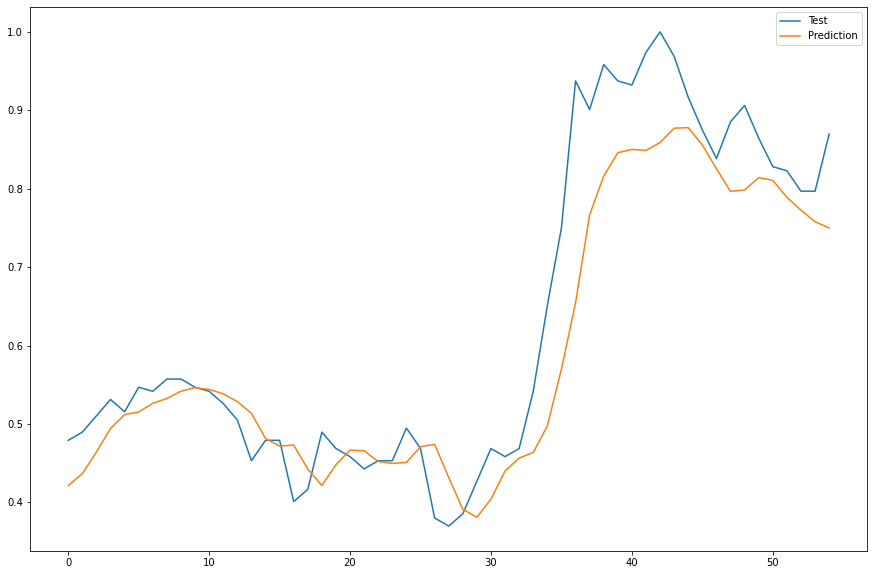

In [53]:
#-----This code is motivated from https://medium.com/@marianne.benkamoun/stock-price-prediction-using-recurrent-neural-networks-369c21817da8
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 


#-------------------------------------------------------------------------------------#
# HFCL Stock
df = pd.read_csv('JPPOWER.NS.csv')
df.head()

#-------------------------------------------------------------------------------------#
# Data Loading and Pre-processing
'''df = pd.read_csv('NASDAQ.csv')
df.head()

L = len(df)
Y = df.iloc[:, 4].values 
Y = np.array(Y)

# No need to reshape 'Y' for plotting
plt.plot(Y)
plt.show(block=False)
'''
L = len(df)
Y = df.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

#-------------------------------------------------------------------------------------#
# Reshaping
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

#-------------------------------------------------------------------------------------#
# Scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))


#----------------------------------------------------------------------------------#
# Train and Test
X_train = X[:190,:,:]
X_test = X[190:,:,:]
Y_train = Y[:190,:]
Y_test = Y[190:,:]

#-----------------------------------------------------------------------------------#
# Model Building
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

#---------------------------------------------------------------------------------#
#Plot 
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()


